In [86]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [123]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

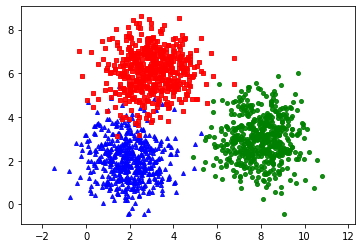

In [124]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .9)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .9)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .9)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [125]:
def choose_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]   # chọn K điểm từ X làm centroids

In [126]:
choose_centroids(X, K)

array([[7.48683363, 1.47458485],
       [6.96039694, 3.55951117],
       [8.83662102, 1.50210209]])

In [134]:
def closet_centroids(X, centroids):
    distance = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))  # tính khoảng cách giữa điểm và centroids
    return np.argmin(distance, axis=0)  # trả ra index của distance nhỏ nhất

In [135]:
def update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        Xi = X[labels == i, :]  #  lấy tất cả các điểm thuộc cluster thứ i 
        centroids[i, :] = np.mean(Xi, axis=0)
    return centroids

In [136]:
def stop_cond(centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids])) # return True nếu việc cập nhật vị trí của các tâm cụm ko thay đổi

In [151]:
def kmeans(X, K):
    count = 0 
    labels = []
    centroids = [choose_centroids(X, K)]
    while True:
        labels.append(closet_centroids(X, centroids[-1]))   
        new_centroids = update_centroids(X, labels[-1], K)  # cập nhật các centroids mới sau mỗi lần lặp
        if stop_cond(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        count += 1
    return (centroids, labels, count)

In [152]:
(centroids, labels, count) = kmeans(X, K)
print(centroids[-1])  # final centroids

[[2.99751254 6.15131095]
 [7.94338517 3.01376019]
 [1.92341994 2.04431458]]


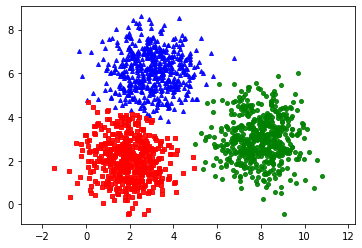

In [153]:
kmeans_display(X, labels[-1])